I am working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
Applied Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Equivalence Relation

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import decomposition
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./bitstrings.csv')

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >


I would select the single linkage such that all the points closest to each other in the cluster are considered and not just the average(average-linkage) or the farthest(complete-linkage) as I feel the closest data points should be considered.

Manhattan distance seems ideal as comparing two bitstrings is done 1 bit at a time and counting all these changes is important.

Threshold distance : 1 as the difference in between clusters should be 1 that implies the clusters can be converted to the other. That's the minimum requirement.

<BarContainer object of 32 artists>

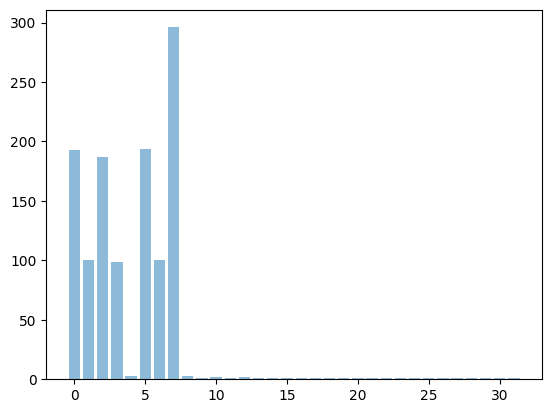

In [4]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='single',compute_full_tree = True, distance_threshold = 2)
labels = hierarchical_cluster.fit_predict(df)
unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts, align='center', alpha=0.5)

### K-Means Clustering for Equivalence Classes

<BarContainer object of 32 artists>

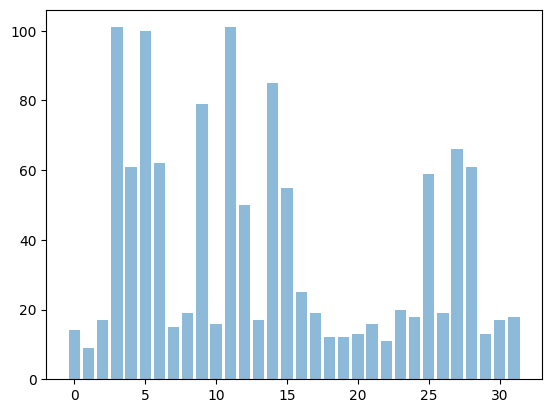

In [5]:
knn = KMeans(n_clusters = 32)
X = df
knn.fit(X)
yhat = knn.predict(df)
unique, counts = np.unique(yhat, return_counts=True)
plt.bar(unique, counts, align='center', alpha=0.5)

## Difference between Agglomerative Clustering and K-Means Clustering

The results are different because there might be some overlap in the clusters that tend to skew the results for K means and agglomerative clustering
The difference is because agglomerative clustering compares the most similar nodes whereas k means clustering does the same but chooses only k number of nodes. This essentially opens possibilities of error as some similar nodes could be missed. However in the case of agglomerative clustering, the ideal clustering grouping is formed hence the difference.

## Principal Component Analysis

We can visualize how the bitstrings are distributed using principal component analysis.

### Generate 2 Clusters 

 - Re-did the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

<BarContainer object of 2 artists>

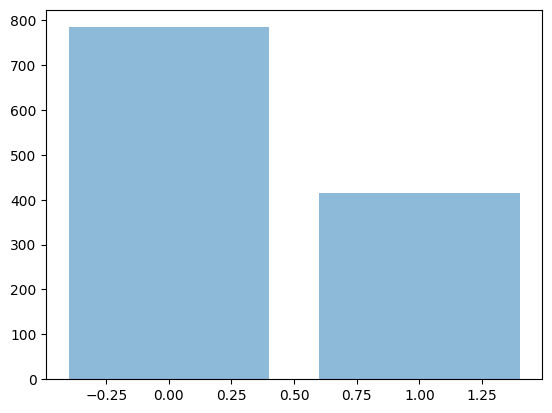

In [6]:
knn = KMeans(n_clusters = 2)   
X = df
knn.fit(X)
yhat = knn.predict(df)
unique, counts = np.unique(yhat, return_counts=True)
plt.bar(unique, counts, align='center', alpha=0.5)

### PCA for Feature Extraction

 - Retrieved the projected dataset with PCA, using ```n_components=2```.
 - Generated a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in the previous section

[[ 3.21409442e-01 -3.06096758e-01 -1.02156181e-01  2.70560417e-02
  -4.47695845e-04 -2.50981696e-01 -4.12780173e-01 -4.13683032e-01
   3.45299971e-01  2.52989994e-01 -1.16802677e-01 -4.70590081e-02
  -1.93474739e-01 -1.27725149e-02 -6.61142282e-03  3.88055346e-01]
 [ 1.87692042e-01  2.30564216e-01 -1.23338419e-01 -4.53380986e-01
  -2.20162332e-01 -1.22983823e-01 -3.00059254e-02  7.24794013e-02
  -1.80331087e-01 -1.17938933e-01 -3.37065981e-01  4.63695260e-01
  -2.44549972e-01 -2.29259172e-01 -3.62506004e-01  4.75850964e-02]]
Highest feature weight is at index 15 with value 0.38805534615503545


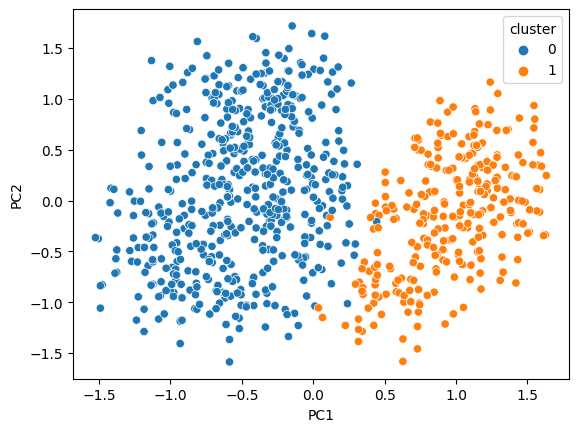

In [7]:
pca = decomposition.PCA(n_components=2)
pca.fit(df)
X = pca.transform(df)

pcadf = pd.DataFrame(data=X, columns=['PC1','PC2'])
df['cluster'] = knn.labels_
pcadf['cluster'] = df['cluster']


sns.scatterplot(x='PC1', y="PC2", data = pcadf, hue='cluster')

feature_weights = pca.components_
print(feature_weights)
print("Highest feature weight is at index {} with value {}".format(feature_weights[0].argmax(),feature_weights[0].max()))